(2048, 3072, 3)


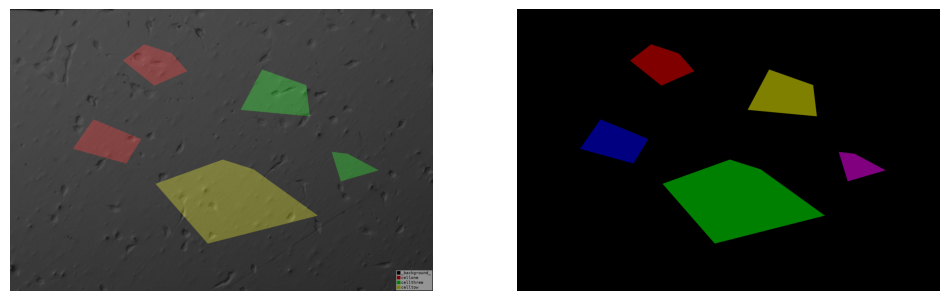

In [5]:
# 可视化labelme的标注数据，
import os
import json
import labelme
import numpy as np
import matplotlib.pyplot as plt
from labelme import utils
import imgviz

json_path = r"C:\somefiles\try\2.json"
label_file = labelme.LabelFile(filename=json_path)
# 读取json文件中记录的图片文件，图片和json文件在同一目录下,可以用plt展示
image = labelme.utils.img_data_to_arr(label_file.imageData) 
print(image.shape)
label_name_to_value = {"_background_": 0}
for shape in sorted(label_file.shapes, key=lambda x: x["label"]): # 按照标签名称排序
	label_name = shape["label"]
	if label_name in label_name_to_value:
		label_value = label_name_to_value[label_name]
	else:
		label_value = len(label_name_to_value)
		label_name_to_value[label_name] = label_value

# lbl是一个二维数组，大小和被标注图片相同，不同类别的对象mask对应位置的值分别标为1，2，3……
# ins与lbl形状相同，但是对每一个实例mask都用不同的值标记
cla, ins = utils.shapes_to_label(image.shape, label_file.shapes, label_name_to_value)

label_names = [None] * (max(label_name_to_value.values()) + 1)

for name, value in label_name_to_value.items():
	label_names[value] = name  # type: ignore[call-overload]


lbl_viz = imgviz.label2rgb(
	cla, imgviz.asgray(image), label_names=label_names, loc="rb"
)

ins_viz = imgviz.label2rgb(ins)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(lbl_viz)
ax[0].axis("off")
ax[1].imshow(ins_viz)
ax[1].axis("off")
plt.show()  # 显示图像

['_background_', 'cellone', 'cellthree', 'celltow']
[0 1]
[0 1 4]
[0 2]
[ 0  6 10]
[0 3]
[0 6]


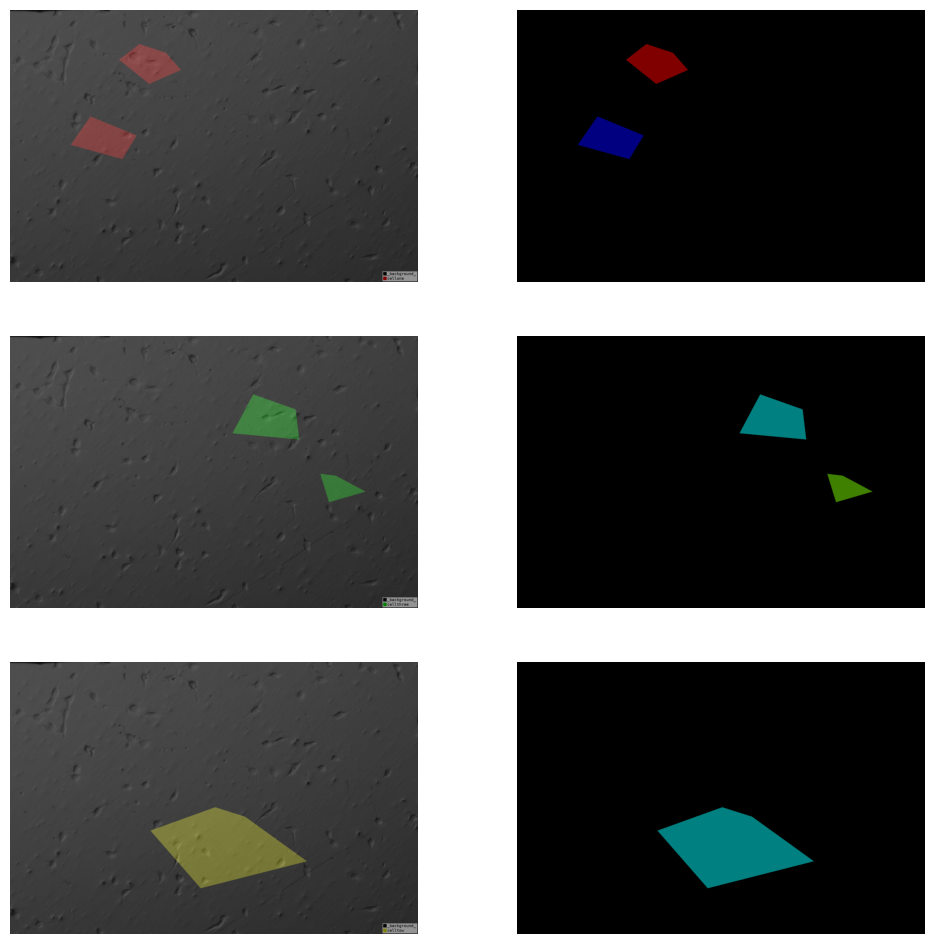

In [7]:
# 尝试把每类都分离出来
print(label_names)

cla_num = len(label_names)

all_cla = []
each_ins = []

for i in range(1, cla_num):
    temp_cla = cla.copy()
    temp_ins = ins.copy()
    temp_cla[temp_cla != i] = 0  # 将非当前类别的像素值设为0
    all_cla.append(temp_cla)  # 保存当前类别的mask
    
    temp_ins = temp_ins * temp_cla
    each_ins.append(temp_ins)
    
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i in range(len(all_cla)):

    cla_show = imgviz.label2rgb(
	all_cla[i], imgviz.asgray(image), label_names=label_names, loc="rb"
    )

    ins_show = imgviz.label2rgb(each_ins[i])
    ax[i, 0].imshow(cla_show)
    ax[i, 0].axis("off")
    ax[i, 1].imshow(ins_show)
    ax[i, 1].axis("off")

for i in range(len(all_cla)):
    print(np.unique(all_cla[i]))
    print(np.unique(each_ins[i]))
plt.show()


(2048, 3072)


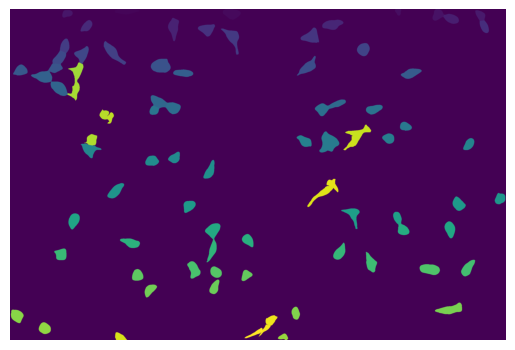

[0.0000000e+00 1.5259022e-05 3.0518044e-05 4.5777066e-05 6.1036088e-05
 7.6295109e-05 9.1554131e-05 1.0681315e-04 1.2207218e-04 1.3733120e-04
 1.5259022e-04 1.6784924e-04 1.8310826e-04 1.9836728e-04 2.1362631e-04
 2.2888533e-04 2.4414435e-04 2.5940337e-04 2.7466239e-04 2.8992142e-04
 3.0518044e-04 3.2043946e-04 3.3569848e-04 3.5095750e-04 3.6621653e-04
 3.8147555e-04 3.9673457e-04 4.1199359e-04 4.2725261e-04 4.4251163e-04
 4.5777066e-04 4.7302968e-04 4.8828870e-04 5.0354772e-04 5.1880674e-04
 5.3406577e-04 5.4932479e-04 5.6458381e-04 5.7984283e-04 5.9510185e-04
 6.1036088e-04 6.2561990e-04 6.4087892e-04 6.5613794e-04 6.7139696e-04
 6.8665599e-04 7.0191501e-04 7.1717403e-04 7.3243305e-04 7.4769207e-04
 7.6295109e-04 7.7821012e-04 7.9346914e-04 8.0872816e-04 8.2398718e-04
 8.3924620e-04 8.5450523e-04 8.6976425e-04 8.8502327e-04 9.0028229e-04
 9.1554131e-04 9.3080034e-04 9.4605936e-04 9.6131838e-04 9.7657740e-04
 9.9183642e-04 1.0070954e-03 1.0223545e-03 1.0376135e-03 1.0528725e-03
 1.068

In [7]:
# 看看cellpose的tif/png标注文件是什么样子的
import os
import matplotlib.pyplot as plt
import numpy as np
img_path = r"C:\somefiles\try\labelmeanno\2_cp_masks.png"
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()
print(np.unique(img))  # 查看像素值的唯一值
# 这存的啥？
print(len(np.unique(img)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


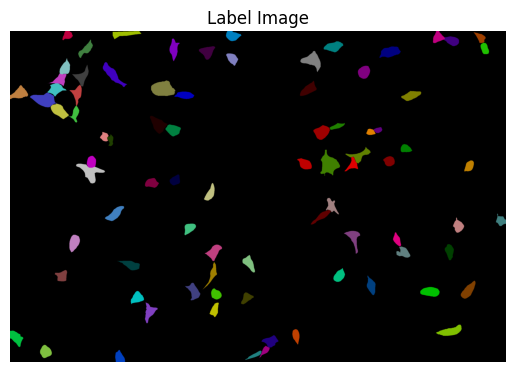

In [1]:
import imgviz
import tifffile
import matplotlib.pyplot as plt
import numpy as np

# 读取 .tif 文件
img_path = r"C:\somefiles\weights_and_dataset\microsam_anno\cell\labels\2_masks.tif"
img = tifffile.imread(img_path)
print(np.unique(img))  # 查看像素值的唯一值
imgviz_img = imgviz.label2rgb(img)
# 展示图像
plt.imshow(imgviz_img, cmap='viridis')
plt.axis("off")
plt.title("Label Image")
plt.show()

400


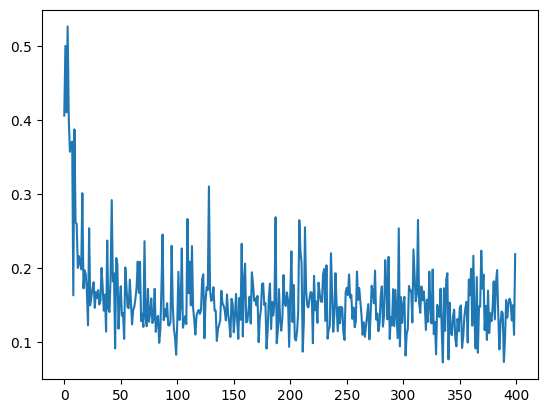

In [1]:
# 读取cellpose训练产生的json文件，并作图
import json
import matplotlib.pyplot as plt
file = open(r"C:\somefiles\weights_and_dataset\cellpose_weights\new_model_loss.json")
data = json.load(file)
print(len(data['train_loss']))
plt.plot(data['train_loss'], label='train loss')
plt.show()

In [7]:
import os
import json

json_file = open(r"C:\somefiles\try\labelmeanno\2.json", 'r')
json_anno = json.load(json_file)
json_file.close()

print(json_anno.keys())
print(json_anno['shapes'])
print(json_anno['shapes'][0].keys())
print(json_anno['shapes'][0]['label'])
print(json_anno['shapes'][0]['points'])

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])
[{'label': 'cellone', 'points': [[974.135593220339, 256.20338983050846], [821.5932203389831, 374.8474576271186], [1048.7118644067796, 556.2033898305084], [1287.6949152542375, 451.1186440677966], [1174.1355932203392, 322.3050847457627]], 'group_id': None, 'description': '', 'shape_type': 'polygon', 'flags': {}, 'mask': None}, {'label': 'celltow', 'points': [[1545.322033898305, 1093.4915254237287], [1057.1864406779664, 1269.7627118644068], [1436.8474576271187, 1703.6610169491526], [2235.1525423728813, 1500.2711864406779], [1769.0508474576272, 1164.677966101695]], 'group_id': None, 'description': '', 'shape_type': 'polygon', 'flags': {}, 'mask': None}, {'label': 'cellthree', 'points': [[1831.7627118644068, 439.2542372881356], [1675.8305084745762, 732.4745762711864], [2177.5254237288136, 779.9322033898304], [2150.406779661017, 552.8135593220338]], 'group_id': None, 'description': '', 'shape_typ